# Data Preparation

In [1]:
import pandas as pd
import numpy as np
import os

adni_demo_filepath = 'datasets/ADNI_Demo.csv'
adni_demo_data = pd.read_csv(adni_demo_filepath)
adni_demo_data.head()


ID  MCI  AD  Gender        Age  Exclude  Height  Weight
0   1001bl    0   1     NaN  69.300000        0     NaN     NaN
1  1001m12    0   1     NaN  70.293840        0     NaN     NaN
2   1002bl    0   0     NaN  76.300000        0     NaN     NaN
3  1002m12    0   0     NaN  77.323956        0     NaN     NaN
4  1002m24    0   0     NaN  78.391718        0     NaN     NaN

In [2]:
import glob
datasets = os.path.join("datasets/", "ADNI_*.csv")
datasets = glob.glob(datasets)
adni_all = pd.concat(map(pd.read_csv, datasets), axis=1, ignore_index=False)
adni_all.to_csv("adni_all.csv", index=False)
adni_all


ID  TotalICVolume  GreyMatter  WhiteMatter  CSF  DeepGreyMatter  \
0      1001bl    1214750.869         NaN          NaN  NaN             NaN   
1     1001m12    1214750.869         NaN          NaN  NaN             NaN   
2      1002bl    1214750.869         NaN          NaN  NaN             NaN   
3     1002m12    1214750.869         NaN          NaN  NaN             NaN   
4     1002m24    1214750.869         NaN          NaN  NaN             NaN   
...       ...            ...         ...          ...  ...             ...   
4454   997m18    1214750.869         NaN          NaN  NaN             NaN   
4455   997m24    1214750.869         NaN          NaN  NaN             NaN   
4456   997m36    1214750.869         NaN          NaN  NaN             NaN   
4457    999bl    1214750.869         NaN          NaN  NaN             NaN   
4458   999m12    1214750.869         NaN          NaN  NaN             NaN   

      Brainstem  Background  NonVentricularCSF  3rdVentricle  ...  \
0           NaN         NaN                NaN   2345.560372  ...   
1           NaN         NaN                NaN   2722.437745  ...   
2           NaN         NaN                NaN   1531.085706  ...   
3           NaN         NaN                NaN   1588.860441  ...   
4           NaN         NaN                NaN   1484.832199  ...   
...         ...         ...                ...           ...  ...   
4454        NaN         NaN                NaN   1927.419302  ...   
4455        NaN         NaN                NaN   1775.479236  ...   
4456        NaN         NaN                NaN   1879.661494  ...   
4457        NaN         NaN                NaN   2943.125075  ...   
4458        NaN         NaN                NaN   3267.768414  ...   

      cog_corr_phonemic_f_value  cog_corr_semantic_f_value  \
0                           NaN                        NaN   
1                           NaN                        NaN   
2                           NaN                        NaN   
3                           NaN                        NaN   
4                           NaN                        NaN   
...                         ...                        ...   
4454                        NaN                        NaN   
4455                        NaN                        NaN   
4456                        NaN                        NaN   
4457                        NaN                        NaN   
4458                        NaN                        NaN   

      cog_corr_attentional_m_value  cog_corr_token_t_value  \
0                              NaN                     NaN   
1                              NaN                     NaN   
2                              NaN                     NaN   
3                              NaN                     NaN   
4                              NaN                     NaN   
...                            ...                     ...   
4454                           NaN                     NaN   
4455                           NaN                     NaN   
4456                           NaN                     NaN   
4457                           NaN                     NaN   
4458                           NaN                     NaN   

      cog_corr_coupled_words_value  cog_corr_spatial_ss_value  \
0                              NaN                        NaN   
1                              NaN                        NaN   
2                              NaN                        NaN   
3                              NaN                        NaN   
4                              NaN                        NaN   
...                            ...                        ...   
4454                           NaN                        NaN   
4455                           NaN                        NaN   
4456                           NaN                        NaN   
4457                           NaN                        NaN   
4458                           NaN      

In [3]:
adni_all = adni_all.dropna(axis=1, how="all")
adni_all.isna().sum()


ID                               0
TotalICVolume                    0
3rdVentricle                     0
4thVentricle                     0
RightAccumbensArea               0
LeftAccumbensArea                0
RightAmygdala                    0
LeftAmygdala                     0
Brainstem.1                      0
RightCaudate                     0
LeftCaudate                      0
RightCelebellumExterior          0
LeftCerebellumExterior           0
RightCerebellumWhiteMatter       0
LeftCerebellumWhiteMatter        0
RightCerebralWhiteMatter         0
LeftCerebralWhiteMatter          0
Unnamed: 25                      0
RightHippocampus                 0
LeftHippocampus                  0
RightInfLatVentricle             0
LeftInflatVentricle              0
RightLateralVentricle            0
LeftLateralVentricle             0
RightPallidum                    0
LeftPallidum                     0
RightPutamen                     0
LeftPutamen                      0
RightThalamusProper 

In [4]:
adni_all = adni_all.drop_duplicates()

adni_all = adni_all.drop(columns=['Unnamed: 19', 'Exclude'], axis=1)

adni_all = adni_all.T.drop_duplicates().T

adni_all["MMSE"] = adni_all["MMSE"].fillna(adni_all["MMSE"].mean())
adni_all["CDRSB"] = adni_all["CDRSB"].fillna(adni_all["CDRSB"].mean())
adni_all["ADAS11"] = adni_all["ADAS11"].fillna(adni_all["ADAS11"].mean())
adni_all["ADAS13"] = adni_all["ADAS13"].fillna(adni_all["ADAS13"].mean())

adni_all.to_csv("adni_all.csv", index=False)
print(sorted(adni_all.isna().sum()))


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [5]:
adni_all_bl = adni_all[adni_all['ID'].str.contains(pat='bl', regex=True)]
print("Number of patients: ",adni_all_bl.shape[0])
print("Patients are aged between: ",adni_all_bl['Age'].astype(int).min()," and ",adni_all_bl['Age'].astype(int).max())

Number of patients:  1670
Patients are aged between:  48  and  91


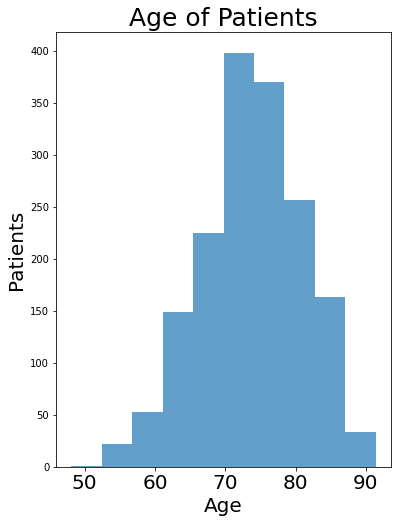

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 8))

visits = adni_all_bl['Age']
ax.hist(visits, bins=10, alpha=0.7)
ax.set_title('Age of Patients', fontsize=25)
ax.set_ylabel('Patients', fontsize=20)
ax.set_xlabel('Age', fontsize=20)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)


count    1670.000000
mean        1.644910
std         1.783677
min         0.000000
25%         0.000000
50%         1.000000
75%         2.500000
max        10.000000
Name: CDRSB, dtype: float64


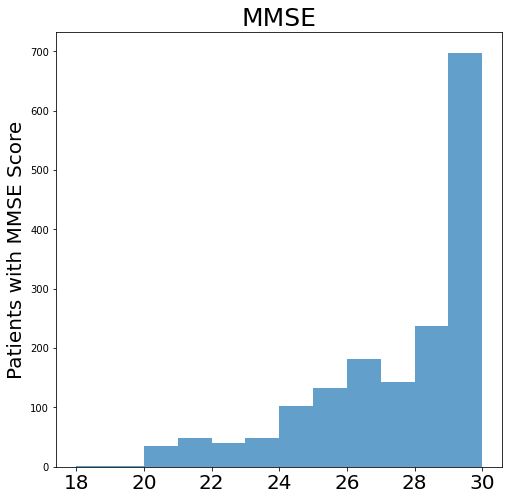

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
print(adni_all_bl['CDRSB'].describe())
visits = adni_all_bl['MMSE']
ax.hist(visits, bins=12, alpha=0.7)
ax.set_title('MMSE', fontsize=25)
ax.set_ylabel('Patients with MMSE Score', fontsize=20)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)


In [9]:
adni_all_bl.loc[adni_all_bl['AD']==1,'AD'] = 2

adni_all_bl.loc[:,'ADvsMCI'] = adni_all_bl.loc[:,'AD'] + adni_all_bl.loc[:,'MCI']

adni_all_bl.loc[adni_all_bl['AD']==2,'AD'] = 1

adni_all_bl = adni_all_bl[adni_all_bl['ADvsMCI']!=0]

adni_all_bl.loc[adni_all_bl['ADvsMCI']==1,'ADvsMCI'] = 0
adni_all_bl.loc[adni_all_bl['ADvsMCI']==2,'ADvsMCI'] = 1


/var/folders/1v/t2whmdgs5150405qbtfr29xc0000gn/T/ipykernel_65898/192382283.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adni_all_bl.loc[:,'ADvsMCI'] = adni_all_bl.loc[:,'AD'] + adni_all_bl.loc[:,'MCI']


326 856 1712


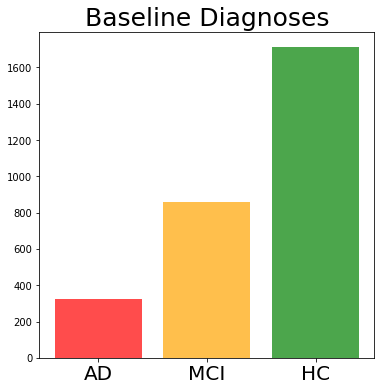

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

ad = adni_all_bl[adni_all_bl['ADvsMCI']==1].shape[0]
mci = adni_all_bl[adni_all_bl['ADvsMCI']==0].shape[0]
hc = adni_all_bl.shape[0] - ad + mci
print(ad,mci,hc)
dxs = [ad, mci, hc]
names = ['AD', 'MCI', 'HC']
heights = [ad, mci, hc]
ax.bar(names, heights, alpha=0.7, color=['red', 'orange', 'green'])
ax.set_title('Baseline Diagnoses', fontsize=25)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)


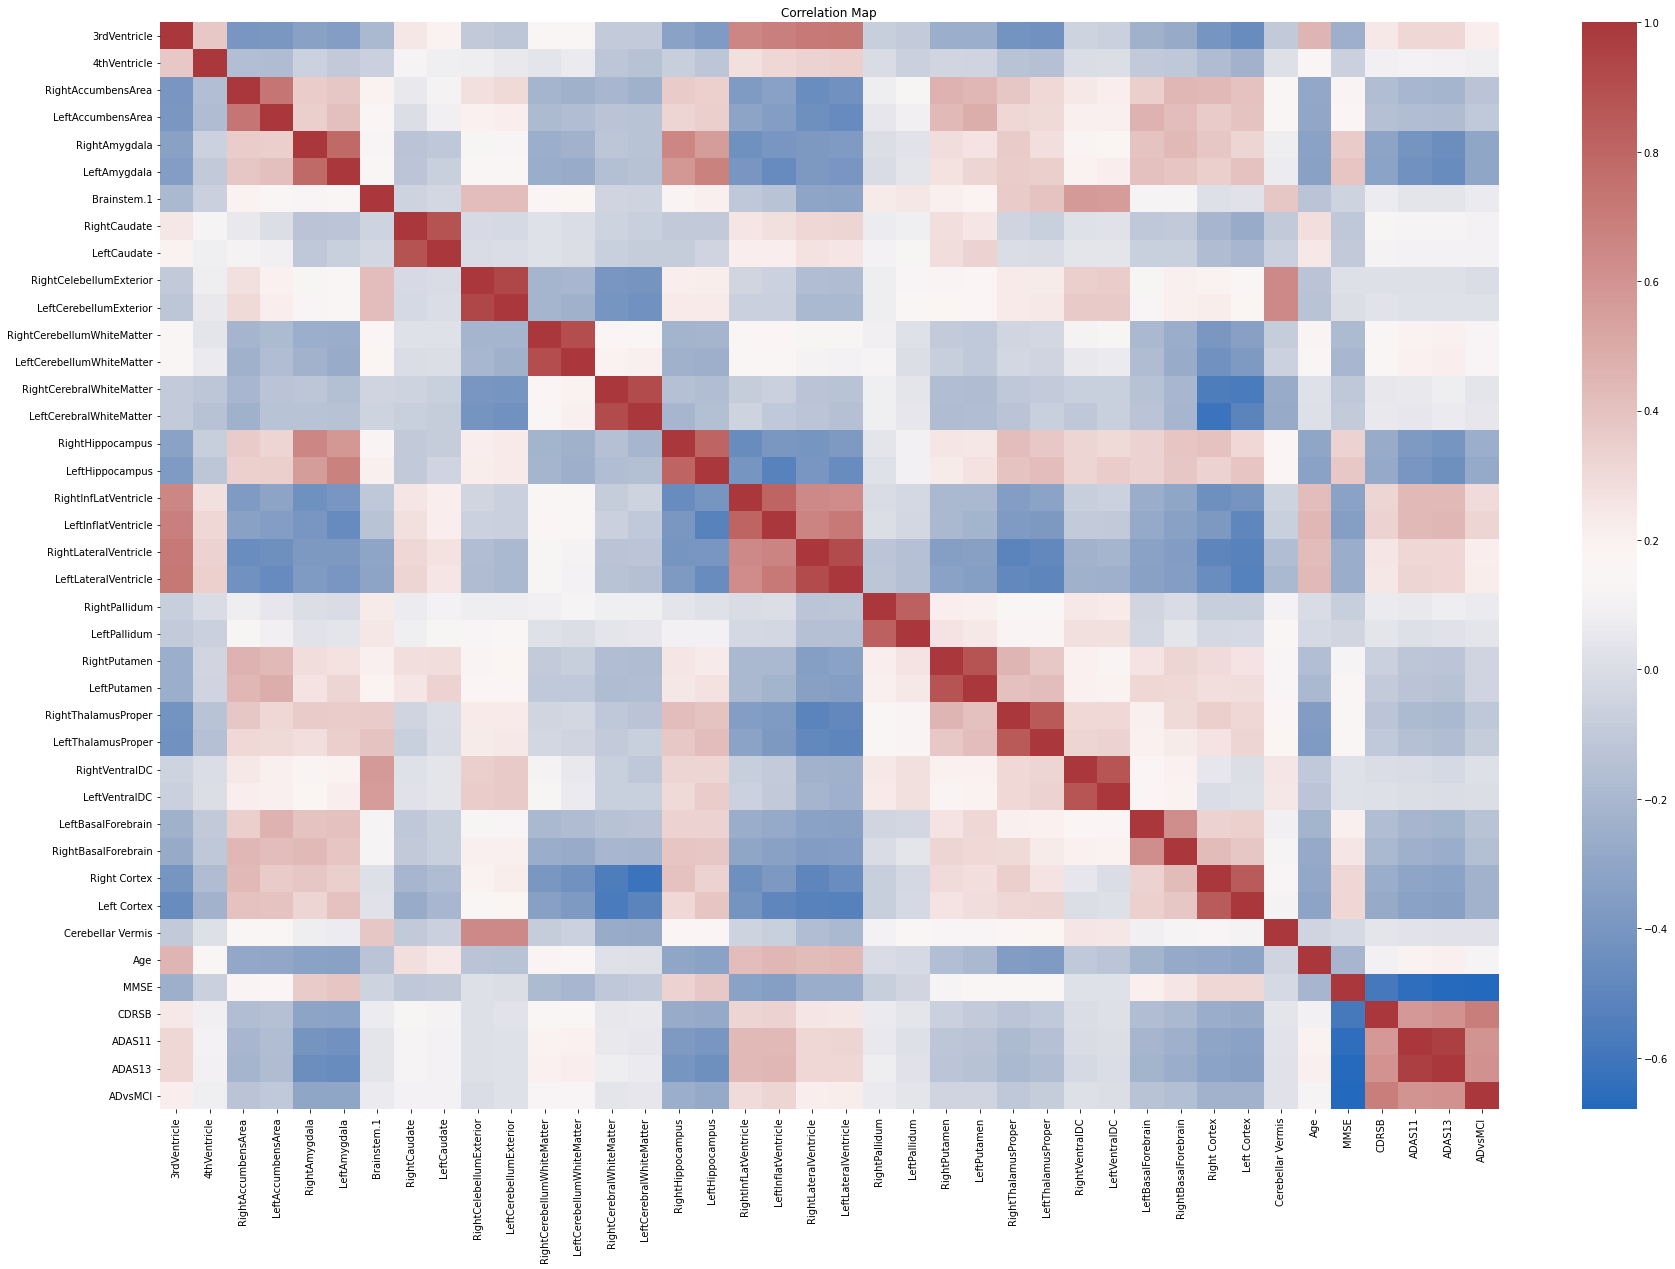

In [11]:
adni_all_bl_corr = adni_all_bl.drop(
    columns=['TotalICVolume', 'ID', 'Unnamed: 25','AD','MCI'], axis=1)
for x in list(adni_all_bl_corr.columns):
    if x == 'ADvsMCI':
        adni_all_bl_corr[x] = adni_all_bl_corr[x].astype('int64')
        continue
    adni_all_bl_corr[x] = adni_all_bl_corr[x].astype('float64')

axes_labels = list(adni_all_bl_corr.columns)

corr = adni_all_bl_corr.corr(method='spearman')

plt.figure(figsize=(30, 20))
ax = sns.heatmap(corr, cmap='vlag')
ax.set_title('Correlation Map')
plt.show()


In [12]:
corr.sort_values(by=['ADvsMCI'], ascending=False).iloc[0].sort_values(
    ascending=False)


ADvsMCI                       1.000000
CDRSB                         0.695477
ADAS13                        0.608924
ADAS11                        0.593310
LeftInflatVentricle           0.322599
RightInfLatVentricle          0.294648
LeftLateralVentricle          0.219058
3rdVentricle                  0.217189
RightLateralVentricle         0.216312
RightCerebellumWhiteMatter    0.133410
LeftCerebellumWhiteMatter     0.133277
Age                           0.117425
RightCaudate                  0.102963
LeftCaudate                   0.101160
4thVentricle                  0.082508
RightPallidum                 0.064561
Brainstem.1                   0.061892
LeftCerebralWhiteMatter       0.042131
LeftPallidum                  0.040599
RightCerebralWhiteMatter      0.037543
Cerebellar Vermis             0.025748
LeftCerebellumExterior        0.021149
RightVentralDC                0.010730
LeftVentralDC                 0.006130
RightCelebellumExterior       0.002380
RightPutamen             

# Training the Models

# ADvsMCI

### Using All Features of Patients' First Visits

#### SVM

In [13]:
from sklearn.model_selection import train_test_split

alzheimer_data = adni_all_bl_corr

X = alzheimer_data.drop(columns=['ADvsMCI'],axis=1)
y = alzheimer_data[['ADvsMCI']]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=0)
print("Train-test split: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)


Train-test split:  (945, 39) (237, 39) (945, 1) (237, 1)


In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svc_all = SVC(kernel="rbf", C=1, gamma="scale")

scores_svc_all = cross_val_score(
    svc_all, X, y.values.ravel(), cv=10, error_score=0.85)
print('Validation Accuracy = ', format(
    scores_svc_all.mean(), '.2%'), '(std: ', scores_svc_all.std()*100, '%)')


Validation Accuracy =  72.42% (std:  0.38643925429488696 %)


In [15]:
import time

start_time = time.time()
svc_all.fit(X_train, y_train.values.ravel())
elapsed_time = time.time() - start_time
print("Training Time: {:.4}".format(elapsed_time))

start_time = time.time()
pred_svc_all = svc_all.predict(X_test)
elapsed_time = time.time() - start_time
print("Classification Time: {:.4}".format(elapsed_time))


Training Time: 0.0157
Classification Time: 0.01032


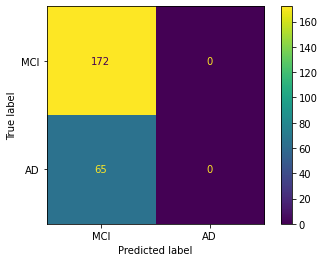

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred_svc_all, labels=svc_all.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['MCI','AD'])
disp.plot()
plt.show()


In [17]:
from sklearn.metrics import classification_report

target_names = ['MCI', 'AD']
print(classification_report(y_test, pred_svc_all, target_names=target_names))


              precision    recall  f1-score   support

         MCI       0.73      1.00      0.85       174
          AD       0.00      0.00      0.00        63

    accuracy                           0.73       237
   macro avg       0.37      0.50      0.42       237
weighted avg       0.54      0.73      0.62       237



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

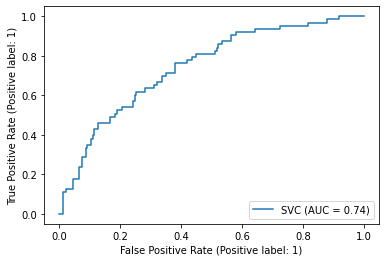

In [18]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(svc_all, X_test, y_test)
plt.show()


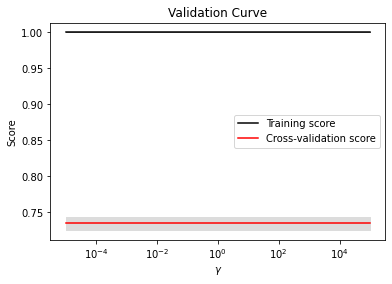

In [19]:
from sklearn.model_selection import validation_curve

train_scores, test_scores = validation_curve(SVC(), X_test, y_test.values.ravel(), param_name='gamma', param_range=np.logspace(-5, 5, 5),
                                             cv=6, scoring='accuracy')
plt.title('Validation Curve')
plt.xlabel('$\gamma$')
plt.ylabel('Score')

plt.semilogx(np.logspace(-5, 5, 5), np.mean(train_scores, axis=1),
             label='Training score', color='black')
plt.semilogx(np.logspace(-5, 5, 5), np.mean(test_scores, axis=1),
             label='Cross-validation score', color='red')

plt.fill_between(np.logspace(-5, 5, 5), np.mean(train_scores, axis=1) - np.std(train_scores,
                 axis=1), np.mean(train_scores, axis=1) + np.std(train_scores, axis=1), color="gray")
plt.fill_between(np.logspace(-5, 5, 5), np.mean(test_scores, axis=1) - np.std(test_scores,
                 axis=1), np.mean(test_scores, axis=1) + np.std(test_scores, axis=1), color="gainsboro")
plt.legend(loc='best')
plt.show()


#### Random Forests

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf_all = RandomForestClassifier()

scores_rf_all = cross_val_score(rf_all, X, y.values.ravel(), cv=10)
print(scores_rf_all)
print('Validation Accuracy = ', format(scores_rf_all.mean(), '.2%'))


[0.92436975 0.92436975 0.93220339 0.96610169 0.95762712 0.95762712
 0.92372881 0.94915254 0.94067797 0.88135593]
Validation Accuracy =  93.57%


In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=1)
print('X_train:', X_train.shape, '\ty_train:', y_train.shape)
print('X_test:', X_test.shape, '\ty_test:', y_test.shape)


X_train: (945, 39) 	y_train: (945, 1)
X_test: (237, 39) 	y_test: (237, 1)


In [22]:
start_time = time.time()
rf_all.fit(X_train, y_train.values.ravel())
elapsed_time = time.time() - start_time
print("Training Time: {:.4}".format(elapsed_time))

start_time = time.time()
pred_rf_all = rf_all.predict(X_test)
elapsed_time = time.time() - start_time
print("Classification Time: {:.4}".format(elapsed_time))


Training Time: 0.1798
Classification Time: 0.004657


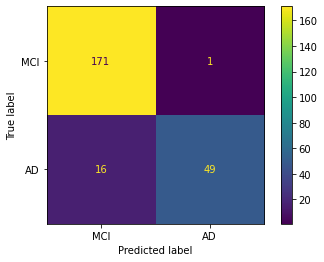

In [44]:
cm = confusion_matrix(y_test, pred_rf_all, labels=rf_all.classes_)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=['MCI','AD'])
disp.plot()
plt.show()


In [24]:
target_names = ['MCI', 'AD']
print(classification_report(y_test, pred_rf_all, target_names=target_names))


              precision    recall  f1-score   support

         MCI       0.91      0.99      0.95       172
          AD       0.98      0.75      0.85        65

    accuracy                           0.93       237
   macro avg       0.95      0.87      0.90       237
weighted avg       0.93      0.93      0.93       237



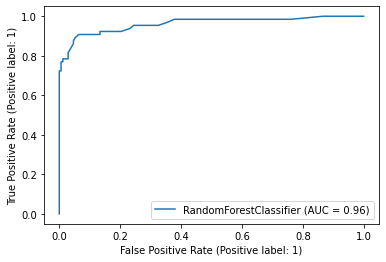

In [25]:
RocCurveDisplay.from_estimator(rf_all, X_test, y_test)
plt.show()


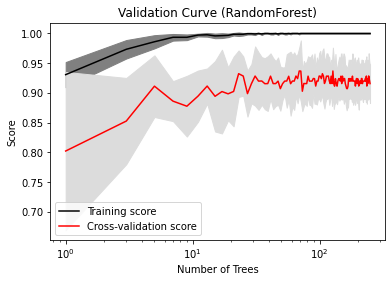

In [26]:
train_scores, test_scores = validation_curve(RandomForestClassifier(), X_test, y_test.values.ravel(), param_name='n_estimators', param_range=np.arange(1, 250, 2),
                                             cv=10, scoring='accuracy', n_jobs=1)

plt.semilogx(np.arange(1, 250, 2), np.mean(train_scores, axis=1),
             label='Training score', color='black')
plt.semilogx(np.arange(1, 250, 2), np.mean(test_scores, axis=1),
             label='Cross-validation score', color='red')

plt.fill_between(np.arange(1, 250, 2), np.mean(train_scores, axis=1) - np.std(train_scores,
                 axis=1), np.mean(train_scores, axis=1) + np.std(train_scores, axis=1), color="gray")
plt.fill_between(np.arange(1, 250, 2), np.mean(test_scores, axis=1) - np.std(test_scores,
                 axis=1), np.mean(test_scores, axis=1) + np.std(test_scores, axis=1), color="gainsboro")

plt.title('Validation Curve (RandomForest)')
plt.xlabel('Number of Trees')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

### Using Several Known-Causal Features Only of Patients' First Visit

In [27]:
X = alzheimer_data[['RightHippocampus', 'LeftHippocampus', 'Age', 'MMSE', 'CDRSB']]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=1)
print('X_train:', X_train.shape, '\ty_train:', y_train.shape)
print('X_test:', X_test.shape, '\ty_test:', y_test.shape)


X_train: (945, 5) 	y_train: (945, 1)
X_test: (237, 5) 	y_test: (237, 1)


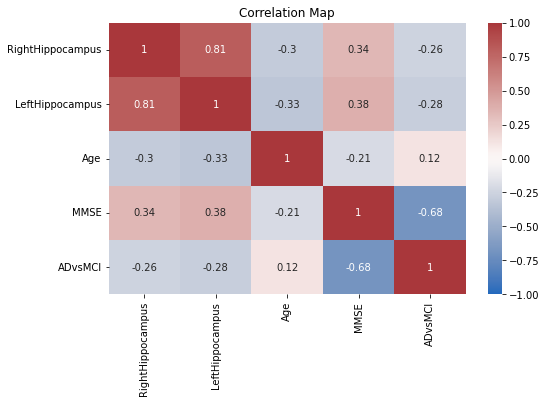

In [28]:
corr = alzheimer_data[['RightHippocampus', 'LeftHippocampus', 'Age', 'MMSE','ADvsMCI']].corr(method='spearman')

plt.figure(figsize=(8, 5))
ax = sns.heatmap(corr, cmap='vlag',vmin=-1,vmax=1,annot=True)
ax.set_title('Correlation Map')
plt.show()

#### SVM

In [29]:
svc_causal = SVC(kernel="rbf", C=1, gamma="scale")

scores_svc_causal = cross_val_score(
    svc_causal, X, y.values.ravel(), cv=10, error_score=0.85)
print('Validation Accuracy = ', format(
    scores_svc_causal.mean(), '.2%'), 'std: ', format(
    scores_svc_causal.std(), '.2%'))


Validation Accuracy =  72.42% std:  0.39%


In [30]:
start_time = time.time()
svc_causal.fit(X_train, y_train.values.ravel())
elapsed_time = time.time() - start_time
print("Training Time: {:.4}".format(elapsed_time))

start_time = time.time()
pred_svc_causal = svc_causal.predict(X_test)
elapsed_time = time.time() - start_time
print("Classification Time: {:.4}".format(elapsed_time))


Training Time: 0.01135
Classification Time: 0.005433


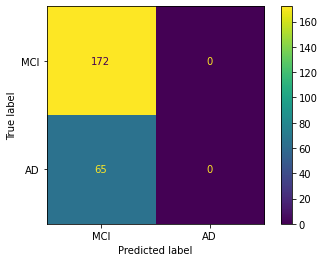

In [42]:
cm = confusion_matrix(y_test, pred_svc_causal, labels=svc_causal.classes_)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=['MCI','AD'])
disp.plot()
plt.show()


In [32]:
target_names = ['MCI', 'AD']
print(classification_report(y_test, pred_svc_causal, target_names=target_names))


              precision    recall  f1-score   support

         MCI       0.73      1.00      0.84       172
          AD       0.00      0.00      0.00        65

    accuracy                           0.73       237
   macro avg       0.36      0.50      0.42       237
weighted avg       0.53      0.73      0.61       237



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

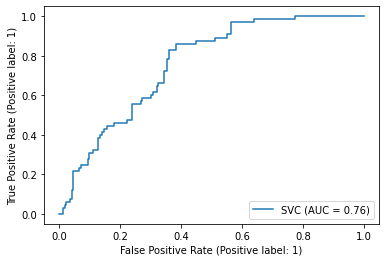

In [33]:
RocCurveDisplay.from_estimator(svc_causal, X_test, y_test)
plt.show()


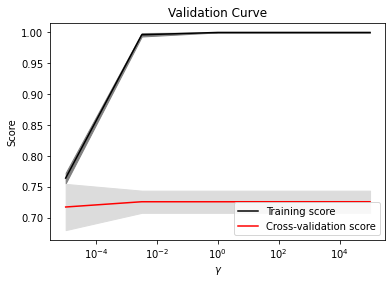

In [34]:
train_scores, test_scores = validation_curve(SVC(), X_test, y_test.values.ravel(), param_name='gamma', param_range=np.logspace(-5, 5, 5),
                                             cv=10, scoring='accuracy', n_jobs=1)
plt.title('Validation Curve')
plt.xlabel('$\gamma$')
plt.ylabel('Score')

plt.semilogx(np.logspace(-5, 5, 5), np.mean(train_scores, axis=1),
             label='Training score', color='black')
plt.semilogx(np.logspace(-5, 5, 5), np.mean(test_scores, axis=1),
             label='Cross-validation score', color='red')

plt.fill_between(np.logspace(-5, 5, 5), np.mean(train_scores, axis=1) - np.std(train_scores,
                 axis=1), np.mean(train_scores, axis=1) + np.std(train_scores, axis=1), color="gray")
plt.fill_between(np.logspace(-5, 5, 5), np.mean(test_scores, axis=1) - np.std(test_scores,
                 axis=1), np.mean(test_scores, axis=1) + np.std(test_scores, axis=1), color="gainsboro")
plt.legend(loc='best')
plt.show()


#### Random Forests

In [35]:
rf_causal = RandomForestClassifier()

scores_rf_causal = cross_val_score(rf_causal, X, y.values.ravel(), cv=10)
print(scores_rf_causal)
print('Validation Accuracy = ', format(scores_rf_causal.mean(), '.2%'))


[0.94117647 0.95798319 0.92372881 0.97457627 0.96610169 0.95762712
 0.94067797 0.90677966 0.93220339 0.88135593]
Validation Accuracy =  93.82%


In [36]:
start_time = time.time()
rf_causal.fit(X_train, y_train.values.ravel())
elapsed_time = time.time() - start_time
print("elapsed time: {:.4}".format(elapsed_time))

start_time = time.time()
pred_rf_causal = rf_causal.predict(X_test)
elapsed_time = time.time() - start_time
print("Classification Time: {:.4}".format(elapsed_time))


elapsed time: 0.07404
Classification Time: 0.004692


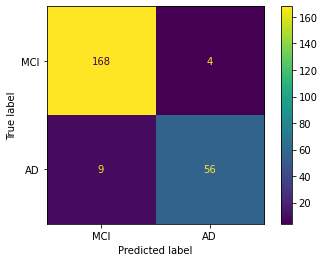

In [50]:
cm = confusion_matrix(y_test, pred_rf_causal, labels=rf_causal.classes_)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=['MCI','AD'])
disp.plot()
plt.show()


In [38]:
target_names = ['MCI', 'AD']
print(classification_report(y_test, pred_rf_causal, target_names=target_names))


              precision    recall  f1-score   support

         MCI       0.95      0.98      0.96       172
          AD       0.93      0.86      0.90        65

    accuracy                           0.95       237
   macro avg       0.94      0.92      0.93       237
weighted avg       0.94      0.95      0.94       237



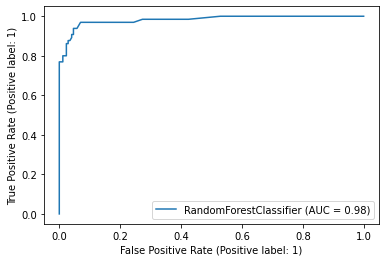

In [39]:
RocCurveDisplay.from_estimator(rf_causal, X_test, y_test)
plt.show()


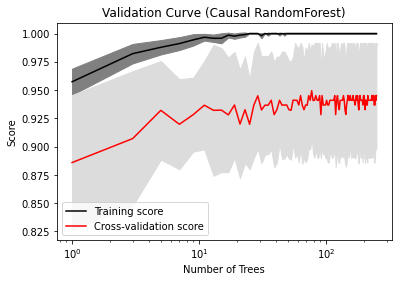

In [40]:
train_scores, test_scores = validation_curve(RandomForestClassifier(), X_test, y_test.values.ravel(), param_name='n_estimators', param_range=np.arange(1, 250, 2),
                                             cv=10, scoring='accuracy', n_jobs=1)

plt.semilogx(np.arange(1, 250, 2), np.mean(train_scores, axis=1),
             label='Training score', color='black')
plt.semilogx(np.arange(1, 250, 2), np.mean(test_scores, axis=1),
             label='Cross-validation score', color='red')

plt.fill_between(np.arange(1, 250, 2), np.mean(train_scores, axis=1) - np.std(train_scores,
                 axis=1), np.mean(train_scores, axis=1) + np.std(train_scores, axis=1), color="gray")
plt.fill_between(np.arange(1, 250, 2), np.mean(test_scores, axis=1) - np.std(test_scores,
                 axis=1), np.mean(test_scores, axis=1) + np.std(test_scores, axis=1), color="gainsboro")

plt.title('Validation Curve (Causal RandomForest)')
plt.xlabel('Number of Trees')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()
